In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/DASA

Mounted at /gdrive
/gdrive/MyDrive/DASA


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import json
from collections import defaultdict
import glob
import matplotlib.pyplot as plt

In [46]:
work_orders = pd.read_csv('/gdrive/MyDrive/DASA/WorkOrders.csv')

In [47]:
work_orders

,Priority,WorkOrder,capable_resource_groups,idle_minutes,ETA,DueDate,Delay,DelayWithoutIdleTime,TimeDifference
0,43,WO100090-40,39,621,2023-11-28 08:35:00.000,2023-05-12 00:00:00.000,200 days 08:35:00,199 days 22:14:00,0 days 10:21:00
1,44,WO100092-30,16|17,189,2023-11-27 14:20:00.000,NaN,NaN,NaN,NaN
2,44,WO100092-40,24,0,2023-11-28 13:19:00.000,NaN,NaN,NaN,NaN
3,67,WO100312-10,2|1,30,2023-11-29 12:37:00.000,2023-08-28 00:00:00.000,93 days 12:37:00,93 days 12:07:00,0 days 00:30:00
4,67,WO100312-20,53,685,2023-12-07 09:22:00.000,2023-08-28 00:00:00.000,101 days 09:22:00,100 days 21:57:00,0 days 11:25:00
...,...,...,...,...,...,...,...,...,...
3120,39,WO92235-10,38,1419,2023-12-01 07:16:00.000,2023-03-03 00:00:00.000,273 days 07:16:00,272 days 07:37:00,0 days 23:39:00
3121,84,WO93770-20,39,721,2023-11-28 11:25:00.000,2023-09-26 00:00:00.000,63 days 11:25:00,62 days 23:24:00,0 days 12:01:00
3122,66,WO97640-10,67,71,2023-11-27 08:11:00.000,2023-08-25 00:00:00.000,94 days 08:11:00,94 days 07:00:00,0 days 01:11:00
3123,35,WO99668-10,38,1389,2023-11-29 12:37:00.000,NaN,NaN,NaN,NaN


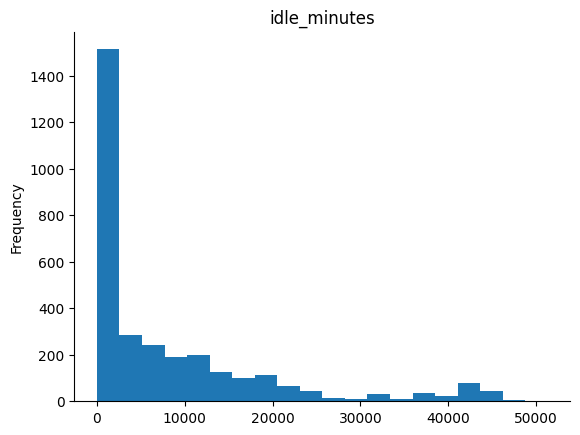

In [48]:
work_orders['idle_minutes'].plot(kind='hist', bins=20, title='idle_minutes')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Orders histogram
From this histogram, we observe that the majority of priorities are high, indicating potential flexibility in execution timing. Higher priority orders, especially those with larger delays, present opportunities for optimization over time through scheduling and optimization algorithms. The scatter plot further illustrates that idle minutes are minimized for orders, as efforts are made to optimize time. Conversely, idle minutes tend to be higher for lower-priority orders. This suggests a strategic focus on time optimization for higher-priority tasks while lower-priority tasks may have more flexibility in terms of idle time

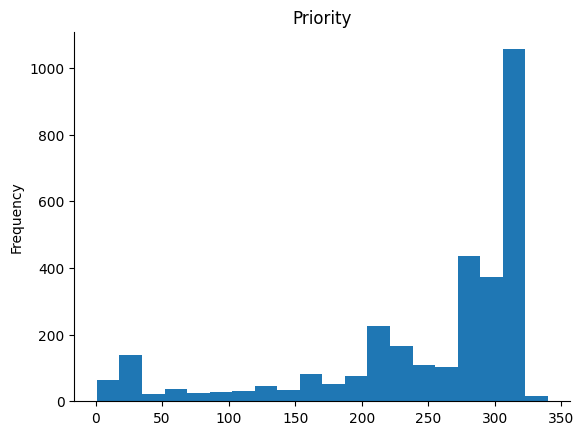

In [49]:
work_orders['Priority'].plot(kind='hist', bins=20, title='Priority')
plt.gca().spines[['top', 'right',]].set_visible(False)

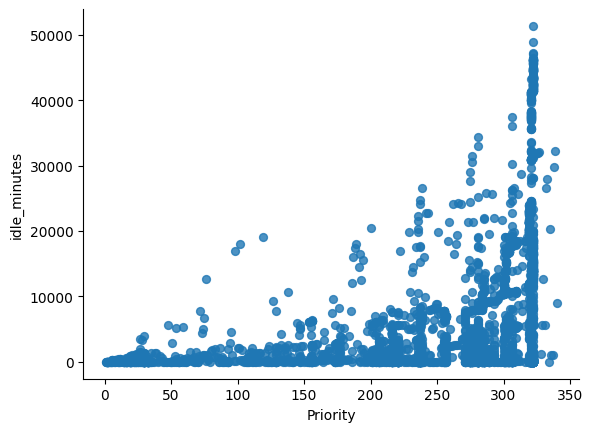

In [50]:
work_orders.plot(kind='scatter', x='Priority', y='idle_minutes', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

# Current Schedule Output

In [69]:
work_orders['Delay'] = pd.to_timedelta(work_orders['Delay']).dt.days.fillna(0)

In [52]:
work_orders

,Priority,WorkOrder,capable_resource_groups,idle_minutes,ETA,DueDate,Delay,DelayWithoutIdleTime,TimeDifference
0,43,WO100090-40,39,621,2023-11-28 08:35:00.000,2023-05-12 00:00:00.000,200.0,199 days 22:14:00,0 days 10:21:00
1,44,WO100092-30,16|17,189,2023-11-27 14:20:00.000,NaN,0.0,NaN,NaN
2,44,WO100092-40,24,0,2023-11-28 13:19:00.000,NaN,0.0,NaN,NaN
3,67,WO100312-10,2|1,30,2023-11-29 12:37:00.000,2023-08-28 00:00:00.000,93.0,93 days 12:07:00,0 days 00:30:00
4,67,WO100312-20,53,685,2023-12-07 09:22:00.000,2023-08-28 00:00:00.000,101.0,100 days 21:57:00,0 days 11:25:00
...,...,...,...,...,...,...,...,...,...
3120,39,WO92235-10,38,1419,2023-12-01 07:16:00.000,2023-03-03 00:00:00.000,273.0,272 days 07:37:00,0 days 23:39:00
3121,84,WO93770-20,39,721,2023-11-28 11:25:00.000,2023-09-26 00:00:00.000,63.0,62 days 23:24:00,0 days 12:01:00
3122,66,WO97640-10,67,71,2023-11-27 08:11:00.000,2023-08-25 00:00:00.000,94.0,94 days 07:00:00,0 days 01:11:00
3123,35,WO99668-10,38,1389,2023-11-29 12:37:00.000,NaN,0.0,NaN,NaN


## Orders and Delays Analysis

From this plot, it is evident that there are both negative and positive delays. For negative delays (anticipation), an algorithmic scheduling approach can be employed to reorganize priorities with respect to the delay. Higher priorities can be adjusted through sensitivity analysis and scheduling algorithms to reduce delay. In cases where a delay is recorded as 'NaN,' it can be filled with the value '0' to assign a meaningful value to orders that have no delay.

In [60]:
max_delay_per_order = work_orders.groupby('Priority')['Delay'].max()

In [61]:
max_delay_per_order

0       200.0
1         0.0
2         0.0
3       105.0
4       105.0
        ...  
3120    273.0
3121     63.0
3122     94.0
3123      0.0
3124      0.0
Name: Delay, Length: 3125, dtype: float64

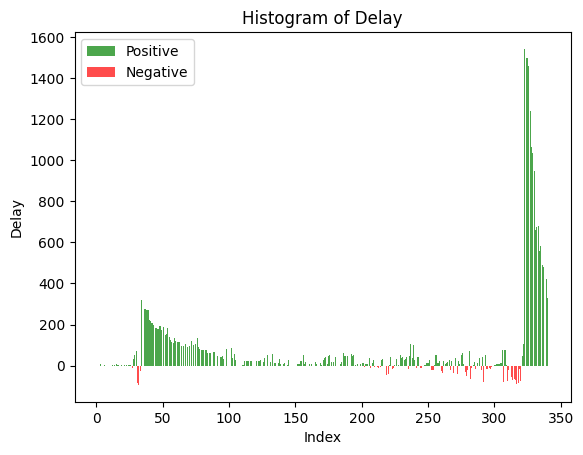

In [42]:
import matplotlib.pyplot as plt

# Assuming your data is stored in a pandas Series named 'delay_data'
# Replace 'delay_data' with the actual variable name if it's different

# Split the data into positive and negative values
positive_values = max_delay_per_order[max_delay_per_order >= 0]
negative_values = max_delay_per_order[max_delay_per_order < 0]

# Create a bar plot for positive values with one color
plt.bar(positive_values.index, positive_values, color='green', alpha=0.7, label='Positive')

# Create a bar plot for negative values with another color
plt.bar(negative_values.index, negative_values, color='red', alpha=0.7, label='Negative')

# Set plot labels and title
plt.xlabel('Index')
plt.ylabel('Delay')
plt.title('Histogram of Delay')

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()


# Delay of each Job

In [62]:
max_delay_per_order = work_orders.groupby('Priority')['Delay'].transform('max')
work_orders['job_delay_per_order']= max_delay_per_order - work_orders['Delay']

In [63]:
work_orders

,Priority,WorkOrder,capable_resource_groups,idle_minutes,ETA,DueDate,Delay,DelayWithoutIdleTime,TimeDifference,job_delay_per_order
0,43,WO100090-40,39,621,2023-11-28 08:35:00.000,2023-05-12 00:00:00.000,200.0,199 days 22:14:00,0 days 10:21:00,0.0
1,44,WO100092-30,16|17,189,2023-11-27 14:20:00.000,NaN,0.0,NaN,NaN,0.0
2,44,WO100092-40,24,0,2023-11-28 13:19:00.000,NaN,0.0,NaN,NaN,0.0
3,67,WO100312-10,2|1,30,2023-11-29 12:37:00.000,2023-08-28 00:00:00.000,93.0,93 days 12:07:00,0 days 00:30:00,12.0
4,67,WO100312-20,53,685,2023-12-07 09:22:00.000,2023-08-28 00:00:00.000,101.0,100 days 21:57:00,0 days 11:25:00,4.0
...,...,...,...,...,...,...,...,...,...,...
3120,39,WO92235-10,38,1419,2023-12-01 07:16:00.000,2023-03-03 00:00:00.000,273.0,272 days 07:37:00,0 days 23:39:00,0.0
3121,84,WO93770-20,39,721,2023-11-28 11:25:00.000,2023-09-26 00:00:00.000,63.0,62 days 23:24:00,0 days 12:01:00,0.0
3122,66,WO97640-10,67,71,2023-11-27 08:11:00.000,2023-08-25 00:00:00.000,94.0,94 days 07:00:00,0 days 01:11:00,0.0
3123,35,WO99668-10,38,1389,2023-11-29 12:37:00.000,NaN,0.0,NaN,NaN,0.0


# Plot the delays of each job

Unless the majority of jobs in the current scheduling system are non-delayed, a subset of jobs must experience delays to synchronize with the one possessing the maximum order. This circumstance may lead to a financial loss

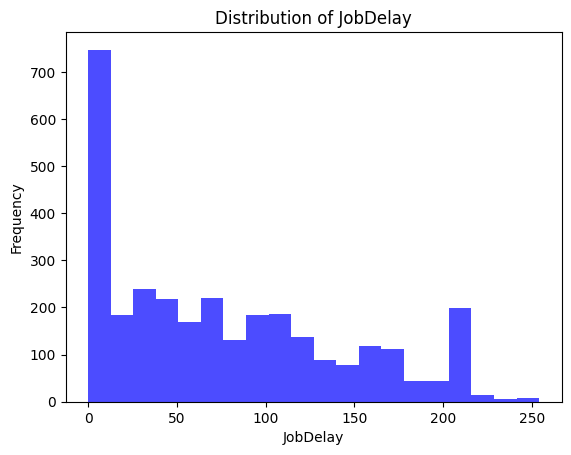

In [65]:
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame named 'df' with the 'JobDelay' column
# Replace 'df' with the actual variable name if it's different

# Create a histogram of 'JobDelay'
plt.hist(work_orders['job_delay_per_order'], bins=20, color='blue', alpha=0.7)

# Set plot labels and title
plt.xlabel('JobDelay')
plt.ylabel('Frequency')
plt.title('Distribution of JobDelay')

# Show the plot
plt.show()

# Economics aspects

Estimating a daily loss of €1000, with the current scheduling system and with respect to the fines size, there is an average loss of €75,880.32.


In [68]:
# Calculate the average number of days lost
average_days_lost = work_orders['job_delay_per_order'].mean()

# Calculate the economic value associated with the average delay
economic_value = average_days_lost * 1000  # Assuming a loss of 1000 euros per day

# Display the results
print(f"Average Days Lost: {average_days_lost:.2f} days")
print(f"Economic Value Associated: €{economic_value:.2f} ")

Average Days Lost: 75.88 days
Economic Value Associated: €75880.32 
